### Streaming History
YoY
Count Plays by Genre, Artist, Song, Mean Song Features(Danceability, Energy, etc)

Deep Dive into this Year
How have genres, song features, etc fluxuated week over week?

Unique Artists, Unique, Tracks, Unique Genres, Listen Count by Genre

In [3]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
#Import data from collection notebook
history = pd.read_csv('../data/streaminghistory.csv')
extendedhistory = pd.read_csv('../data/extendedhistory.csv')

In [23]:
comb = pd.concat([history['trackID'], extendedhistory['track_id_x']])
comb.drop_duplicates()

0        1jQfgl9WRle7D8a3GXLwaD
1        54I1dC6Ux5I4h7U44DmjgK
2        4rnriM1hFyeRrdRQSZd9uA
3        5FG7Tl93LdH117jEKYl3Cm
4        7ifz6wYLdZ1ujxzXSnBTvd
                  ...          
39709    0nxkVSwDNX8M46ejw7ltuS
39710    1HhnuLKDmlAhfhAjkXLZgW
39711    6bWD65sXguqUE4AaiEXqlw
39712    4kflXMtDdukfphfpvp1708
39713    3UGNdLrhhsK0SY9gNqe8TT
Length: 12462, dtype: object

In [25]:
len(history['trackID'].unique())

1426

In [26]:
len(extendedhistory['track_id_x'].unique())

12324

In [32]:
history['endTime'].min()

'2021-10-26 23:02'

In [33]:
history.shape

(3624, 24)

In [47]:
extended['username'].unique()

array([1212918474], dtype=int64)

In [27]:
1426 + 12324

13750

In [40]:
history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3624 entries, 0 to 3623
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3624 non-null   int64  
 1   endTime            3624 non-null   object 
 2   artistName         3624 non-null   object 
 3   trackName          3624 non-null   object 
 4   msPlayed           3624 non-null   int64  
 5   count              3624 non-null   int64  
 6   artist_id          3624 non-null   object 
 7   genres             3624 non-null   object 
 8   artist_popularity  3624 non-null   float64
 9   followers          3624 non-null   float64
 10  trackID            3624 non-null   object 
 11  danceability       3624 non-null   float64
 12  energy             3624 non-null   float64
 13  key                3624 non-null   float64
 14  loudness           3624 non-null   float64
 15  mode               3624 non-null   float64
 16  speechiness        3624 

In [41]:
history.drop(columns = 'Unnamed: 0', inplace = True)

In [43]:
extended.isnull().sum()

ts                                       0
username                                 0
platform                                 0
ms_played                                0
conn_country                             0
ip_addr_decrypted                        0
user_agent_decrypted                  1364
master_metadata_track_name               0
master_metadata_album_artist_name        0
master_metadata_album_album_name         0
spotify_track_uri                        0
episode_name                         39716
episode_show_name                    39716
spotify_episode_uri                  39716
reason_start                             0
reason_end                               0
shuffle                                  0
skipped                              31105
offline                                  0
offline_timestamp                        0
incognito_mode                           0
track_id_x                               0
trackID                                  1
danceabilit

In [48]:
to_drop = ['track_id_y', 'track_id_x', 'incognito_mode', 'offline_timestamp', 'offline', 
           'skipped', 'shuffle', 'reason_end', 'reason_start', 'username', 'platform',
           'ms_played', 'conn_country', 'ip_addr_decrypted', 'user_agent_decrypted',
          'episode_name', 'episode_show_name', 'spotify_episode_uri']

extended.drop(columns = to_drop, inplace = True)

In [58]:
extended.head(1)

,ts,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,trackID,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artist_id,genre,popularity,followers
0,2015-05-27T16:34:37Z,Have You Ever Loved A Woman,Freddie King,Are You Ready For Freddie?,spotify:track:6r99GoBd08u7ajWGpvdyxm,6r99GoBd08u7ajWGpvdyxm,0.418,0.47,2.0,-9.442,...,0.405,0.125,0.377,79.024,765306.0,4.0,5dCuFngSPyOOnTAvrC7v2s,"[acoustic blues, blues, blues rock, classic ro...",51.0,351319.0


In [64]:
extended['year'] = [x[:4] for x in extended['ts']]
extended['listen_count'] = 1
extended['listen_count']

0        1
1        1
2        1
3        1
4        1
        ..
39711    1
39712    1
39713    1
39714    1
39715    1
Name: listen_count, Length: 39716, dtype: int64

In [104]:
yoy_listens = extended.groupby(by = 'year')['listen_count'].sum()

In [105]:
year

year
2012      82
2014    1634
2015    5728
2016    4960
2017    5223
2018    4352
2019    6271
2020    3639
2021    4417
2022    3410
Name: listen_count, dtype: int64

In [113]:
extended.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39716 entries, 0 to 39715
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ts                                 39716 non-null  object 
 1   master_metadata_track_name         39716 non-null  object 
 2   master_metadata_album_artist_name  39716 non-null  object 
 3   master_metadata_album_album_name   39716 non-null  object 
 4   spotify_track_uri                  39716 non-null  object 
 5   trackID                            39715 non-null  object 
 6   danceability                       39715 non-null  float64
 7   energy                             39715 non-null  float64
 8   key                                39715 non-null  float64
 9   loudness                           39715 non-null  float64
 10  mode                               39715 non-null  float64
 11  speechiness                        39715 non-null  flo

In [123]:
genres = []
for x in range(0,39716):
    try:
        genres.append([a for a in extended['genre'][x]])
    except:
        pass

In [125]:
genres = sum(genres, [])

In [128]:
len(set(genres))

1109

In [159]:
yoy_listens_genre = extended.groupby(by = ['year'])['genre']

In [155]:
for key in yoy_listens_genre:
    print(yoy_listens_genre.get_group(key), "\n\n")

TypeError: unhashable type: 'DataFrame'

In [160]:
yoy_listens_genre.agg('sum')

year
2012    [brill building pop, classic soul, funk, motow...
2014    [alternative rock, anti-folk, canadian indie, ...
2015    [acoustic blues, blues, blues rock, classic ro...
2016    [smooth jazz, pop punk, punk, rock, socal pop ...
2017    [dance pop, hip hop, pop, r&b, urban contempor...
2018    [blues rock, modern blues, modern blues rock, ...
2019    [deep groove house, disco house, dutch edm, ed...
2020    [alternative emo, indie pop, indie rock, new j...
2021    [melodic rap, pop rap, rap, slap house, altern...
2022    [australian indie, australian pop, dance pop, ...
Name: genre, dtype: object

In [162]:
#Breaking Down Data YoY
df2014 = extended[extended['year'] == '2014']
df2015 = extended[extended['year'] == '2015']
df2016 = extended[extended['year'] == '2016']
df2017 = extended[extended['year'] == '2017']
df2018 = extended[extended['year'] == '2018']
df2019 = extended[extended['year'] == '2019']
df2020 = extended[extended['year'] == '2020']
df2021 = extended[extended['year'] == '2021']
df2022 = extended[extended['year'] == '2022']

In [179]:
display('Top 10 Artists Each Year')
display('2014')
display(df2014.groupby('master_metadata_album_artist_name')['listen_count'].sum().sort_values(ascending =False)[:10])
display('2015')
display(df2015.groupby('master_metadata_album_artist_name')['listen_count'].sum().sort_values(ascending =False)[:10])
display('2016')
display(df2016.groupby('master_metadata_album_artist_name')['listen_count'].sum().sort_values(ascending =False)[:10])
display('2017')
display(df2017.groupby('master_metadata_album_artist_name')['listen_count'].sum().sort_values(ascending =False)[:10])
display('2018')
display(df2018.groupby('master_metadata_album_artist_name')['listen_count'].sum().sort_values(ascending =False)[:10])
display('2019')
display(df2019.groupby('master_metadata_album_artist_name')['listen_count'].sum().sort_values(ascending =False)[:10])
display('2020')
display(df2020.groupby('master_metadata_album_artist_name')['listen_count'].sum().sort_values(ascending =False)[:10])
display('2021')
display(df2021.groupby('master_metadata_album_artist_name')['listen_count'].sum().sort_values(ascending =False)[:10])
display('2022')
display(df2022.groupby('master_metadata_album_artist_name')['listen_count'].sum().sort_values(ascending =False)[:10])

'Top 10 Artists Each Year'

'2014'

master_metadata_album_artist_name
The Black Keys    219
Built To Spill    112
Bon Iver           64
Justin Bieber      57
Kid Cudi           56
John Mayer         45
Rebelution         44
Otis Redding       43
Iration            39
Mike Posner        38
Name: listen_count, dtype: int64

'2015'

master_metadata_album_artist_name
Freddie King          317
Kid Cudi              311
The Black Keys        255
Stevie Ray Vaughan    210
John Mayer            206
Common                165
Miguel                119
Robben Ford           118
Otis Redding          118
Albert King           116
Name: listen_count, dtype: int64

'2016'

master_metadata_album_artist_name
Julien Baker          303
James Brown           274
blink-182             146
Drake                 116
The Pharcyde           97
Usher                  96
The Chainsmokers       92
Etta James             84
Dave Matthews Band     76
John Legend            69
Name: listen_count, dtype: int64

'2017'

master_metadata_album_artist_name
Anderson .Paak          333
Shawn Mendes            208
Julien Baker            177
The Marcus King Band    140
Kygo                    117
Freddie King            114
Justin Bieber           102
Miguel                   95
Maxwell                  94
Justin Timberlake        93
Name: listen_count, dtype: int64

'2018'

master_metadata_album_artist_name
St. Paul & The Broken Bones    326
Stan Taylor                    314
Boyce Avenue                   251
Big Sean                       186
Drake                          149
XXXTENTACION                    91
Gary Clark Jr.                  90
Lake Street Dive                89
Leon Bridges                    87
Sam Smith                       71
Name: listen_count, dtype: int64

'2019'

master_metadata_album_artist_name
Daniel Caesar                  376
City and Colour                344
Etta James                     236
Pinegrove                      177
Lewis Watson                   131
The Dip                        130
Creed                          123
St. Paul & The Broken Bones    111
The Smashing Pumpkins          105
Musiq Soulchild                 92
Name: listen_count, dtype: int64

'2020'

master_metadata_album_artist_name
Pinegrove               496
City and Colour         168
The Marcus King Band    141
The Teskey Brothers      66
Tom Misch                59
Justin Bieber            53
Melanie Faye             49
Marcus King              49
Julien Baker             45
blink-182                38
Name: listen_count, dtype: int64

'2021'

master_metadata_album_artist_name
Giveon               375
Jazmine Sullivan     225
SiR                  145
Beyoncé               91
Ella Mai              86
Daniel Caesar         86
Free Nationals        85
Nia Sultana           83
Holly Humberstone     80
Adele                 70
Name: listen_count, dtype: int64

'2022'

master_metadata_album_artist_name
Beyoncé             226
Summer Walker       213
Adele               172
Leon Bridges        105
L.A.B.               92
MEDUZA               79
Jazmine Sullivan     72
Kali Uchis           71
Kanye West           70
Steve Lacy           69
Name: listen_count, dtype: int64

In [200]:
display('Top 10 Tracks Each Year')
display('2014')
display(df2014.groupby('master_metadata_track_name')['listen_count'].sum().sort_values(ascending =False)[:10])
display('2015')
display(df2015.groupby('master_metadata_track_name')['listen_count'].sum().sort_values(ascending =False)[:10])
display('2016')
display(df2016.groupby('master_metadata_track_name')['listen_count'].sum().sort_values(ascending =False)[:10])
display('2017')
display(df2017.groupby('master_metadata_track_name')['listen_count'].sum().sort_values(ascending =False)[:10])
display('2018')
display(df2018.groupby('master_metadata_track_name')['listen_count'].sum().sort_values(ascending =False)[:10])
display('2019')
display(df2019.groupby('master_metadata_track_name')['listen_count'].sum().sort_values(ascending =False)[:10])
display('2020')
display(df2020.groupby('master_metadata_track_name')['listen_count'].sum().sort_values(ascending =False)[:10])
display('2021')
display(df2021.groupby('master_metadata_track_name')['listen_count'].sum().sort_values(ascending =False)[:10])
display('2022')
display(df2022.groupby('master_metadata_track_name')['listen_count'].sum().sort_values(ascending =False)[:10])

'Top 10 Tracks Each Year'

'2014'

master_metadata_track_name
Carry the Zero                  30
Latch                           28
Boyfriend - Acoustic Version    26
Same Old Thing                  20
Boyfriend                       20
Psychotic Girl                  19
So He Won't Break               18
Lies                            18
Is This Love                    17
Time Bomb                       17
Name: listen_count, dtype: int64

'2015'

master_metadata_track_name
Have You Ever Loved A Woman       69
Going Down - Remastered           43
Fooled Around And Fell In Love    31
Me And My Guitar                  31
Just What I Am                    31
I'm Not The Only One              31
Life by the Drop                  30
These Arms of Mine                28
I'd Rather Go Blind               27
Amsterdam                         27
Name: listen_count, dtype: int64

'2016'

master_metadata_track_name
Earth Angel                                52
Sprained Ankle                             49
Something                                  45
When a Man Loves a Woman                   39
Rejoice                                    36
Sometimes I Cry                            35
Crash into Me                              35
Brittle Boned                              31
Just the Two of Us (feat. Bill Withers)    31
It's A Man's, Man's, Man's World           31
Name: listen_count, dtype: int64

'2017'

master_metadata_track_name
The Bird                                 48
Am I Wrong (feat. ScHoolboy Q)           46
Heart Don't Stand a Chance               41
Come Down                                40
The Waters (feat. BJ the Chicago Kid)    34
Mercy                                    34
There's Nothing Holdin' Me Back          32
Treat You Better                         31
Put Me Thru                              29
I Can't Make You Love Me                 29
Name: listen_count, dtype: int64

'2018'

master_metadata_track_name
Jocelyn Flores                            86
Living Single                             68
True Colors                               62
Me and Mrs. Jones                         48
Grass Is Greener                          43
Let's Stay Together                       34
Flow with It (You Got Me Feeling Like)    33
You Were Meant for Me                     33
Go Legend (& Metro Boomin)                33
Sanctify                                  32
Name: listen_count, dtype: int64

'2019'

master_metadata_track_name
Omen - Radio Edit             82
Hello, I'm In Delaware        63
Day Old Hate                  55
Never in My Wildest Dreams    55
Get You (feat. Kali Uchis)    50
One Last Breath               49
Aphasia                       43
Atlas                         41
Sam Malone                    39
Blessed                       36
Name: listen_count, dtype: int64

'2020'

master_metadata_track_name
The Alarmist      68
No Drugs          42
Moment            39
Hairpin           31
Phase             27
Darkness          26
Endless           26
Aphasia           23
Old Friends       21
Look After You    18
Name: listen_count, dtype: int64

'2021'

master_metadata_track_name
Favorite Mistake                  73
Like I Want You                   59
Heartbreak Anniversary            57
You Can't Save Me                 55
Not Another Love Song             52
Later                             47
Girl Like Me (feat. H.E.R.)       46
On It                             42
This Ain't Love                   41
Thinking 'Bout Love - Acoustic    40
Name: listen_count, dtype: int64

'2022'

master_metadata_track_name
CPR                                107
Coming Home                         72
Lose Control                        72
Session 32                          64
telepatía                           63
One Right Now (with The Weeknd)     61
Hometown Glory                      59
In the Air                          57
On It                               52
Bad Habit                           50
Name: listen_count, dtype: int64

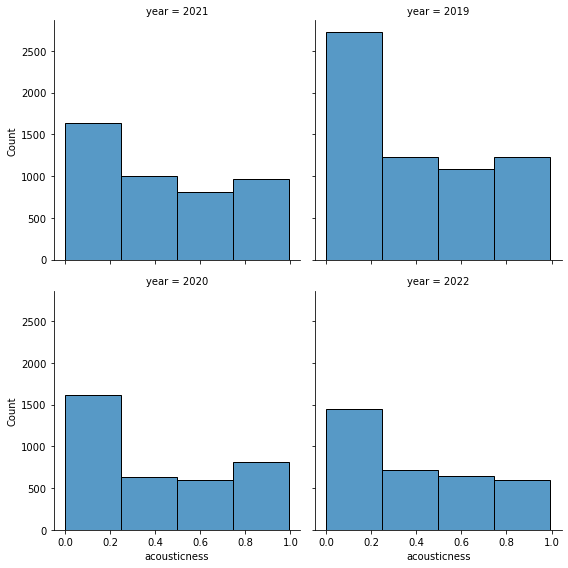

In [192]:
#Last 4 years acousticness
sns.displot(data=extended[extended['year'].isin(['2022','2021','2019','2020'])], x='acousticness', col = 'year', col_wrap=2, common_bins=True, bins=4, height=4);

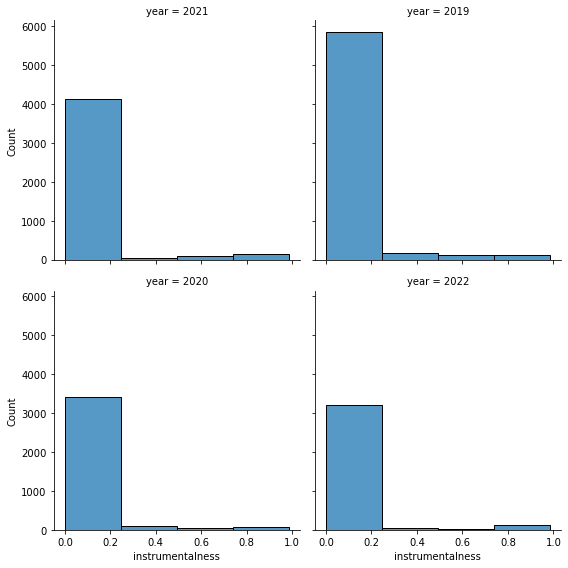

In [193]:
#Last 4 years instrumental
sns.displot(data=extended[extended['year'].isin(['2022','2021','2019','2020'])], x='instrumentalness', col = 'year', col_wrap=2, common_bins=True, bins=4, height=4);

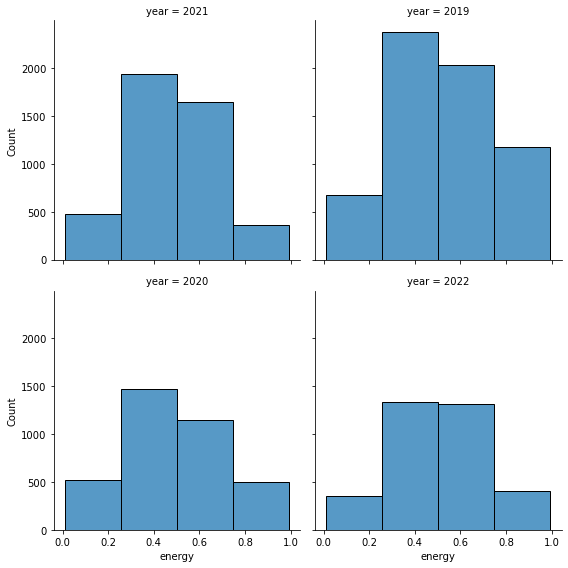

In [196]:
#Last 4 years energy
sns.displot(data=extended[extended['year'].isin(['2022','2021','2019','2020'])], x='energy', col = 'year', col_wrap=2, common_bins=True, bins=4, height=4);

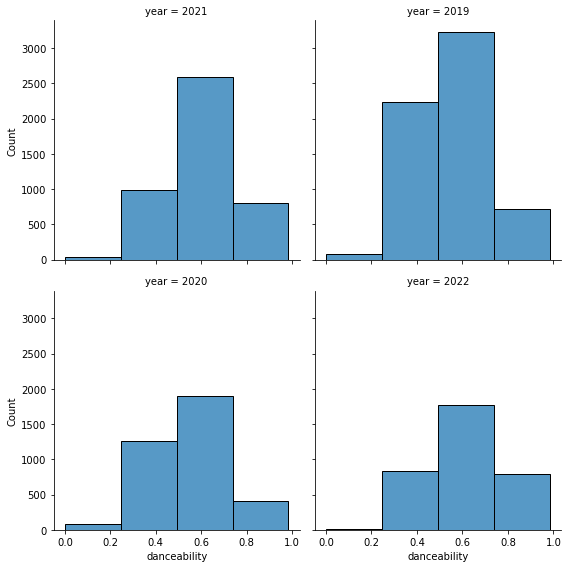

In [197]:
#Last 4 years danceability
sns.displot(data=extended[extended['year'].isin(['2022','2021','2019','2020'])], x='danceability', col = 'year', col_wrap=2, common_bins=True, bins=4, height=4);

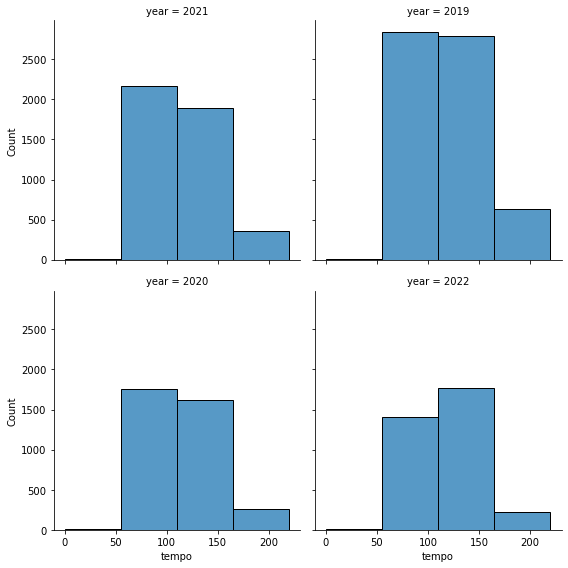

In [198]:
#Last 4 years tempo
sns.displot(data=extended[extended['year'].isin(['2022','2021','2019','2020'])], x='tempo', col = 'year', col_wrap=2, common_bins=True, bins=4, height=4);

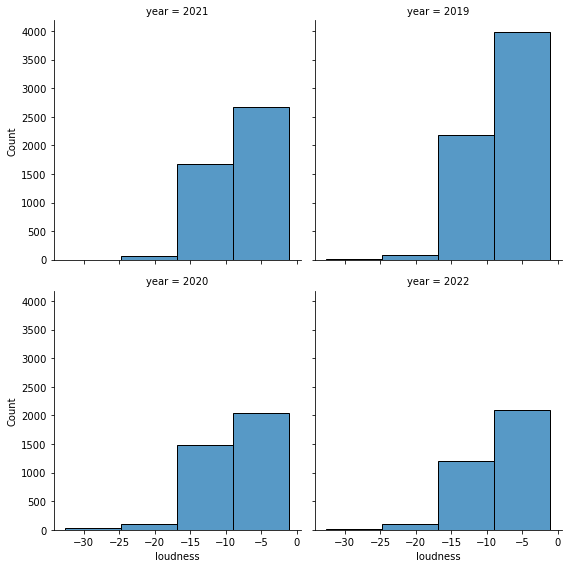

In [199]:
#Last 4 years loudness
sns.displot(data=extended[extended['year'].isin(['2022','2021','2019','2020'])], x='loudness', col = 'year', col_wrap=2, common_bins=True, bins=4, height=4);

In [ ]:
#lineplot the mean features value over year